In [1]:
 import pandas as pd
    

In [2]:
import numpy as np

In [3]:
import scipy.stats as stats

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [9]:
#before filling missing values
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [10]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [11]:
#after filling missing values
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [12]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [15]:
#train and test split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


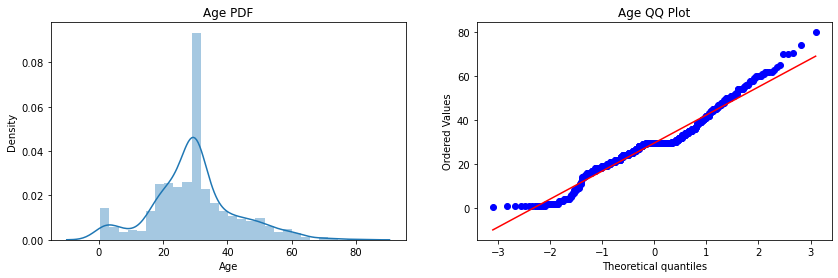

In [20]:
plt.figure(figsize=(14,4)) #To change the size of the figure
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


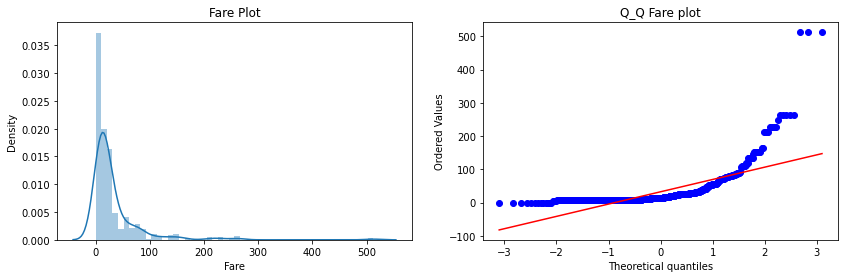

In [23]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare Plot')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Q_Q Fare plot')

plt.show()

In [30]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [31]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [35]:
y_pred_1=clf.predict(X_test)
y_pred_2=clf2.predict(X_test)

In [42]:
print('Accuracy Score of LR is {0} and DTC is {1} '.format(accuracy_score(y_test,y_pred_1),accuracy_score(y_test,y_pred_2)))

Accuracy Score of LR is 0.6480446927374302 and DTC is 0.664804469273743 


In [46]:
## Applying the function Transformer
trf=FunctionTransformer(func=np.log1p)


In [50]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformer = trf.transform(X_test)

In [48]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [51]:
clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [53]:
y_pred_1=clf.predict(X_test_transformed)
y_pred_2=clf2.predict(X_test_transformed)

In [54]:
print('Accuracy Score of LR is {0} and DTC is {1} '.format(accuracy_score(y_test,y_pred_1),accuracy_score(y_test,y_pred_2)))

Accuracy Score of LR is 0.6815642458100558 and DTC is 0.6703910614525139 


In [58]:
X_transformed=trf.fit_transform(x)
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print('DTC',np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DTC 0.6566167290886392


Text(0.5, 1.0, 'Age After Transformation')

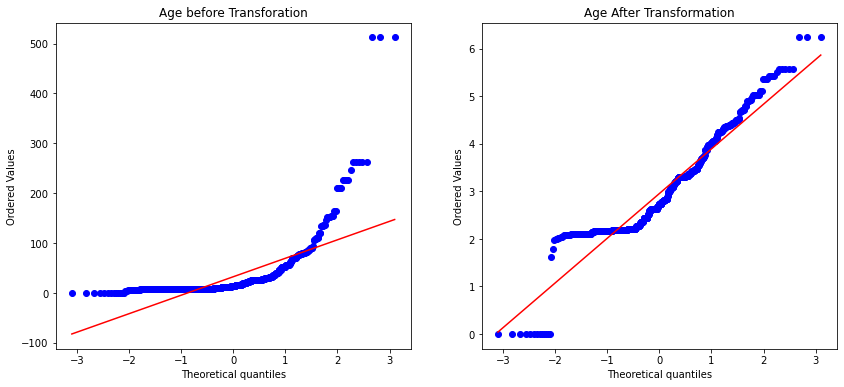

In [61]:
plt.figure(figsize=(14,6))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)

plt.title('Fare before log Transforation')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist='norm',plot=plt)
plt.title('Fare After log Transformation')

Text(0.5, 1.0, 'Age after log distrubution')

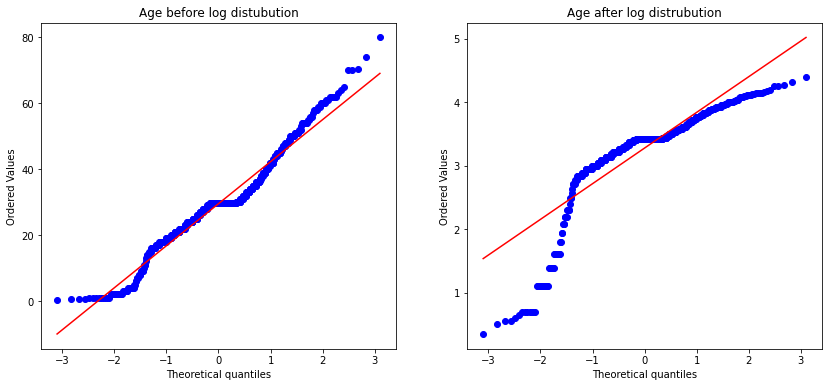

In [62]:
plt.figure(figsize=(14,6))
plt.subplot(121)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age before log distubution')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist='norm',plot=plt)
plt.title('Age after log distrubution')

The distrubution of Age is very good before transformation but after transformation the distrubition become bad

In [63]:
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6442446941323345


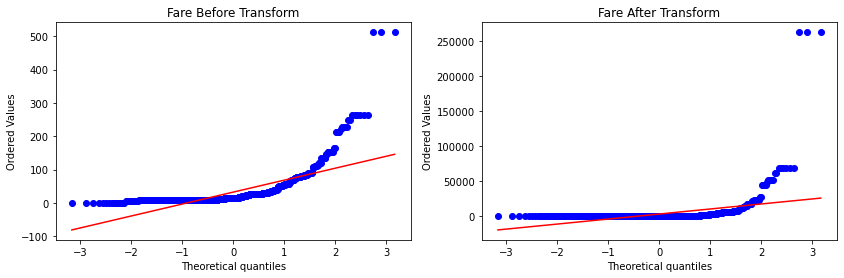

In [64]:
apply_transform(lambda x:x**2)